<a href="https://colab.research.google.com/github/2303c50181-kiranmysa/KiranMysa/blob/main/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

Sample Agricultural Market Data:
        date       price      demand   rainfall  temperature
0 2020-01-01  102.483571  490.909051  13.424321    22.434087
1 2020-01-02   99.753046  502.448850   0.712986    18.378853
2 2020-01-03  104.127075  471.321046   4.174335    20.851215
3 2020-01-04  108.947843  519.815229   5.443872    24.060274
4 2020-01-05  100.605682  551.992626   0.192612    17.089893

Data Shape: (1000, 5)


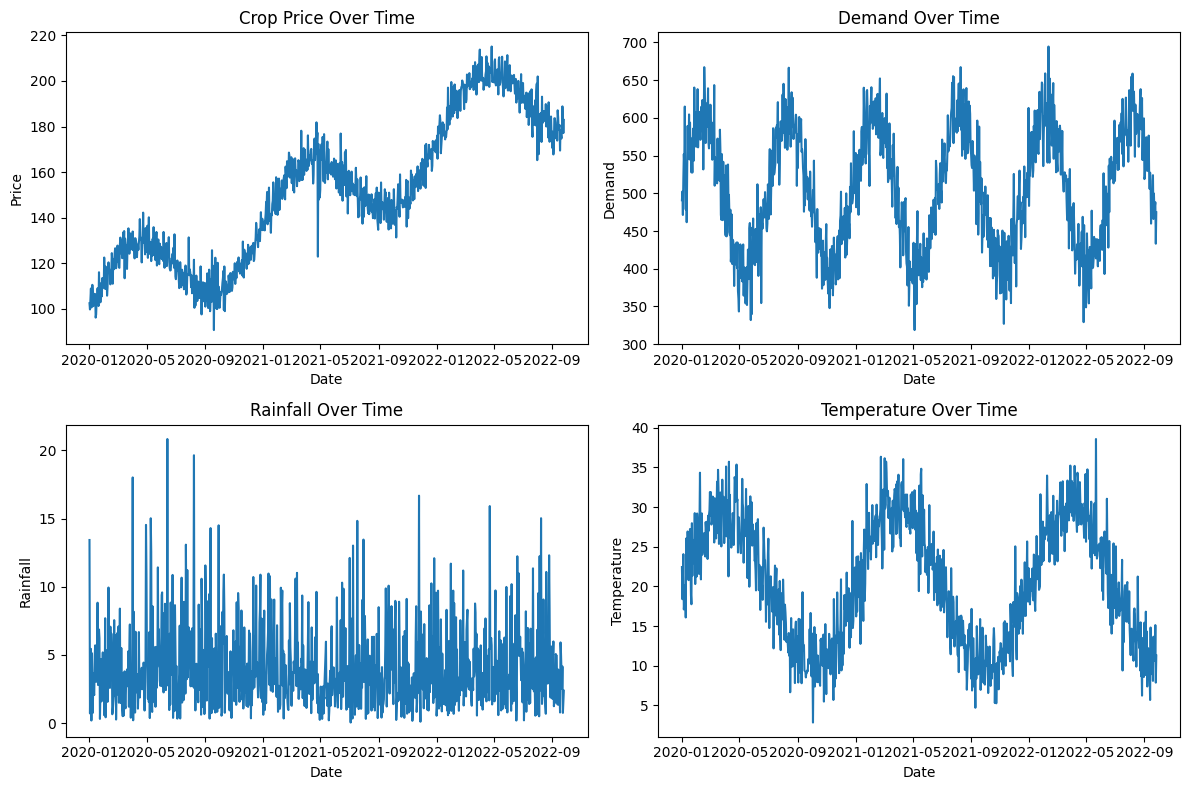

Training data shape: (776, 30, 4)
Testing data shape: (194, 30, 4)
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0563 - val_loss: 0.0155
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - val_loss: 0.0023
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - val_loss: 0.0065
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044 - val_loss: 0.0066
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - val_loss: 0.0

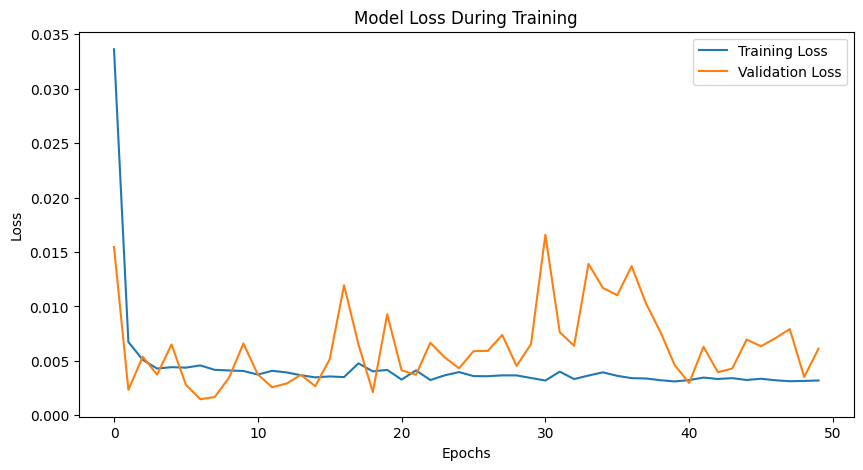

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training MAE: 5.14, RMSE: 6.63
Testing MAE: 8.90, RMSE: 10.24


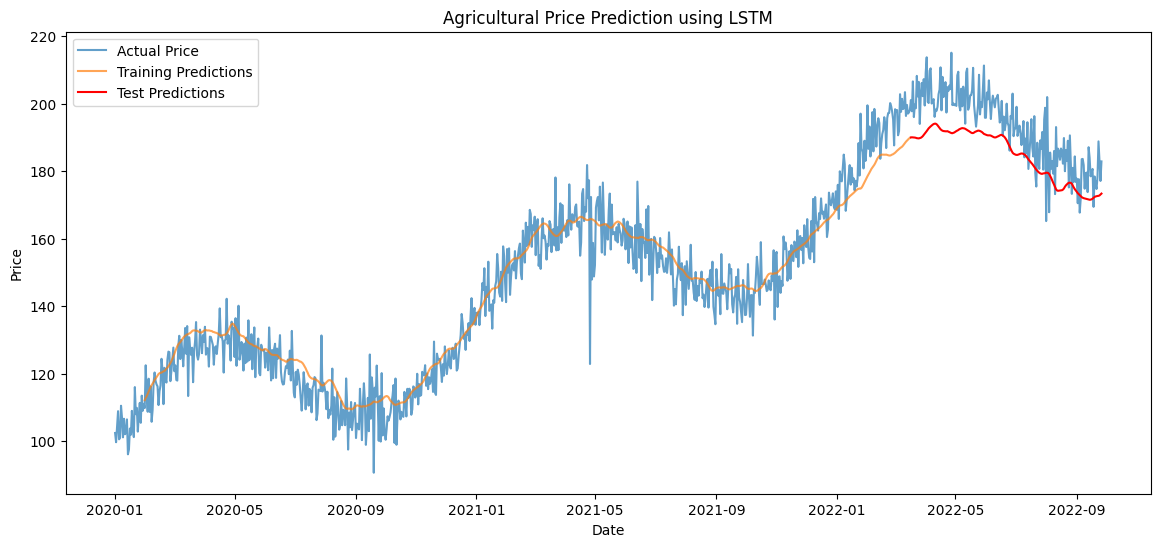

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Current Price: 182.93
Predicted Price for Next Day: 173.65
Recommendation: Prices are expected to drop significantly. Consider selling immediately.

=== Multi-Agent System Simulation ===
Farmer F001 inventory updated to 100 units
Matching buy and sell orders...
Matched 2 orders
Successfully matched 2 transactions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic agricultural market data (as we don't have real dataset)
def generate_synthetic_data(days=1000):
    dates = pd.date_range(start='2020-01-01', periods=days)

    # Base price with upward trend
    base_price = np.linspace(100, 200, days)

    # Seasonal component (yearly seasonality)
    seasonal = 20 * np.sin(2 * np.pi * np.arange(days) / 365)

    # Random noise
    noise = np.random.normal(0, 5, days)

    # Special events (sudden price changes)
    events = np.zeros(days)
    for i in range(5):
        event_day = np.random.randint(100, days-50)
        events[event_day:event_day+30] = np.random.normal(0, 15, 30) * np.exp(-0.1 * np.arange(30))

    # Create final price series
    price = base_price + seasonal + noise + events

    # Generate related features
    demand = 500 + 100 * np.sin(2 * np.pi * np.arange(days) / 180) + np.random.normal(0, 30, days)
    rainfall = np.random.gamma(2, 2, days)
    temperature = 20 + 10 * np.sin(2 * np.pi * np.arange(days) / 365) + np.random.normal(0, 3, days)

    # Create DataFrame
    data = pd.DataFrame({
        'date': dates,
        'price': price,
        'demand': demand,
        'rainfall': rainfall,
        'temperature': temperature
    })

    return data

# Generate synthetic data
agricultural_data = generate_synthetic_data(1000)

# Display first few rows
print("Sample Agricultural Market Data:")
print(agricultural_data.head())
print("\nData Shape:", agricultural_data.shape)

# Visualize the data
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(agricultural_data['date'], agricultural_data['price'])
plt.title('Crop Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.plot(agricultural_data['date'], agricultural_data['demand'])
plt.title('Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')

plt.subplot(2, 2, 3)
plt.plot(agricultural_data['date'], agricultural_data['rainfall'])
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall')

plt.subplot(2, 2, 4)
plt.plot(agricultural_data['date'], agricultural_data['temperature'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

# Prepare data for LSTM model
def prepare_data(data, lookback=30):
    # Select features
    features = data[['price', 'demand', 'rainfall', 'temperature']].values

    # Scale the features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)

    X, y = [], []
    for i in range(lookback, len(scaled_features)):
        X.append(scaled_features[i-lookback:i])
        y.append(scaled_features[i, 0])  # Predicting the price (first column)

    return np.array(X), np.array(y), scaler

# Prepare the data
lookback = 30  # Use 30 days of historical data to predict next day's price
X, y, scaler = prepare_data(agricultural_data, lookback)

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.1, verbose=1)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the scaling
# Create dummy arrays for inverse transformation
train_dummy = np.zeros((len(train_predict), 4))
test_dummy = np.zeros((len(test_predict), 4))

train_dummy[:, 0] = train_predict[:, 0]
test_dummy[:, 0] = test_predict[:, 0]

train_predict = scaler.inverse_transform(train_dummy)[:, 0]
test_predict = scaler.inverse_transform(test_dummy)[:, 0]

# Create corresponding actual values arrays
train_actual = np.zeros((len(y_train), 4))
test_actual = np.zeros((len(y_test), 4))

train_actual[:, 0] = y_train
test_actual[:, 0] = y_test

train_actual = scaler.inverse_transform(train_actual)[:, 0]
test_actual = scaler.inverse_transform(test_actual)[:, 0]

# Calculate evaluation metrics
train_mae = mean_absolute_error(train_actual, train_predict)
train_rmse = np.sqrt(mean_squared_error(train_actual, train_predict))

test_mae = mean_absolute_error(test_actual, test_predict)
test_rmse = np.sqrt(mean_squared_error(test_actual, test_predict))

print(f"Training MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}")
print(f"Testing MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")

# Visualize the predictions
plt.figure(figsize=(14, 6))

# Create index for test data
test_index = range(len(agricultural_data) - len(test_actual), len(agricultural_data))

plt.plot(agricultural_data['date'], agricultural_data['price'], label='Actual Price', alpha=0.7)

# Plot training predictions
train_plot_index = range(lookback, lookback + len(train_predict))
plt.plot(agricultural_data['date'].iloc[train_plot_index], train_predict, label='Training Predictions', alpha=0.7)

# Plot test predictions
plt.plot(agricultural_data['date'].iloc[test_index], test_predict, label='Test Predictions', color='red')

plt.title('Agricultural Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Simulate a farmer recommendation system
def generate_recommendation(current_data, model, scaler, lookback=30):
    # Scale the current data
    scaled_data = scaler.transform(current_data)

    # Prepare for prediction
    X_current = scaled_data[-lookback:].reshape(1, lookback, 4)

    # Make prediction
    scaled_prediction = model.predict(X_current)

    # Create dummy array for inverse transformation
    dummy = np.zeros((1, 4))
    dummy[0, 0] = scaled_prediction[0, 0]

    # Inverse transform
    prediction = scaler.inverse_transform(dummy)[0, 0]

    # Generate recommendations based on prediction
    current_price = current_data.iloc[-1]['price']
    price_change = ((prediction - current_price) / current_price) * 100

    if price_change > 5:
        recommendation = "Prices are expected to rise significantly. Consider holding your produce for a few more days."
    elif price_change > 2:
        recommendation = "Prices are expected to rise moderately. You could wait for better prices."
    elif price_change < -5:
        recommendation = "Prices are expected to drop significantly. Consider selling immediately."
    elif price_change < -2:
        recommendation = "Prices are expected to drop moderately. Consider selling soon."
    else:
        recommendation = "Prices are expected to remain stable. You can sell at your convenience."

    return prediction, recommendation

# Test the recommendation system with the last available data
current_market_data = agricultural_data[['price', 'demand', 'rainfall', 'temperature']].iloc[-50:]
predicted_price, recommendation = generate_recommendation(current_market_data, model, scaler)

print(f"\nCurrent Price: {current_market_data['price'].iloc[-1]:.2f}")
print(f"Predicted Price for Next Day: {predicted_price:.2f}")
print(f"Recommendation: {recommendation}")

# Simulate the Multi-Agent System concept (simplified)
class FarmerAgent:
    def __init__(self, farmer_id, location, produce_type):
        self.farmer_id = farmer_id
        self.location = location
        self.produce_type = produce_type
        self.inventory = 0

    def update_inventory(self, amount):
        self.inventory += amount
        print(f"Farmer {self.farmer_id} inventory updated to {self.inventory} units")

    def request_price_prediction(self, market_data, model, scaler):
        _, recommendation = generate_recommendation(market_data, model, scaler)
        return recommendation

class MarketAgent:
    def __init__(self):
        self.buy_orders = []
        self.sell_orders = []

    def match_orders(self):
        print("Matching buy and sell orders...")
        # Simplified matching logic
        matched = min(len(self.buy_orders), len(self.sell_orders))
        print(f"Matched {matched} orders")
        return matched

# Demonstrate agent interaction
print("\n=== Multi-Agent System Simulation ===")
farmer1 = FarmerAgent("F001", "Telangana", "Wheat")
farmer1.update_inventory(100)

market_agent = MarketAgent()
market_agent.buy_orders = ["B001", "B002", "B003"]
market_agent.sell_orders = ["S001", "S002"]

matched_orders = market_agent.match_orders()
print(f"Successfully matched {matched_orders} transactions")

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate sample agricultural dataset
def generate_agricultural_dataset():
    # Create date range
    dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')

    # Crops mentioned in the Indian context
    crops = ['Wheat', 'Rice', 'Cotton', 'Sugarcane', 'Pulses', 'Oilseeds']

    # States mentioned in the paper
    states = ['Telangana', 'Maharashtra', 'Punjab', 'Uttar Pradesh', 'Karnataka']

    data = []
    for date in dates:
        for crop in crops:
            for state in states:
                # Base price with seasonal variation
                base_price = np.random.uniform(1000, 5000)
                seasonal_factor = 0.2 * np.sin(2 * np.pi * (date.dayofyear / 365))
                price = base_price * (1 + seasonal_factor + np.random.normal(0, 0.1))

                # Other features
                demand = np.random.uniform(100, 1000)
                supply = np.random.uniform(50, 800)
                rainfall = np.random.gamma(2, 2)
                temperature = np.random.normal(25, 5)
                humidity = np.random.uniform(40, 90)

                data.append({
                    'date': date,
                    'crop': crop,
                    'state': state,
                    'price': price,
                    'demand': demand,
                    'supply': supply,
                    'rainfall': rainfall,
                    'temperature': temperature,
                    'humidity': humidity,
                    'market_access_index': np.random.uniform(0.5, 0.9)
                })

    return pd.DataFrame(data)

# Generate and save sample dataset
agricultural_df = generate_agricultural_dataset()
agricultural_df.to_csv('indian_agricultural_market_data.csv', index=False)
print("Sample dataset generated with shape:", agricultural_df.shape)

Sample dataset generated with shape: (43830, 10)


In [4]:
# Example API endpoints (hypothetical)
API_ENDPOINTS = {
    'weather': 'https://api.weather.gov/',
    'commodity_prices': 'https://api.agmarknet.gov.in/prices',
    'crop_yield': 'https://agriculture.data.gov/yield',
    'soil_data': 'https://soil-api.example.com/data'
}